# CNN in CIFAR-10

In [1]:
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


## Load Data

In [0]:
# load data
(x_img_train, y_label_train), (x_img_test, y_label_test) = cifar10.load_data()

In [3]:
# show data size
print('train:', len(x_img_train), 'size:', x_img_train.shape)
print('test:', len(x_img_test))

('train:', 50000, 'size:', (50000, 32, 32, 3))
('test:', 10000)


In [0]:
label_dict={0:'airplane', 1:'automobile', 2:'bird', 3:'cat', 4:'deer', 5:'dog', 6:'frog', 7:'horse', 8:'ship', 9:'truck'}

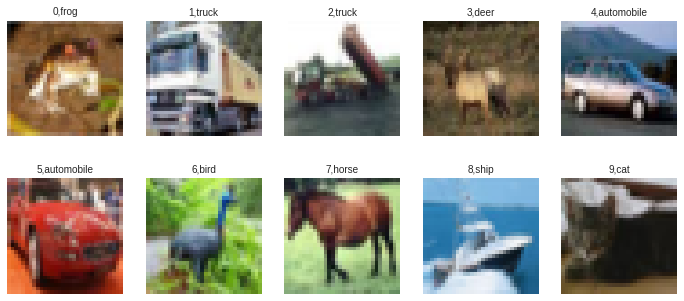

In [5]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images, labels, prediction, idx, num=10):
  fig=plt.gcf()
  fig.set_size_inches(12, 14)
  if num > 25: num = 25
  for i in range(0, num):
    ax = plt.subplot(5, 5, 1 + i)
    ax.imshow(images[idx], cmap='binary')
    title = str(i) + ',' + label_dict[labels[i][0]]
    if len(prediction) > 0:
      title += '=>'+label_dict[prediction[i]]
    ax.set_title(title, fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])
    idx += 1
  plt.show()

plot_images_labels_prediction(x_img_train, y_label_train, [], 0)

In [0]:
from keras.utils import np_utils
# normalize
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

# one- hot encoding
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)

## CNN with Two Convolution Layers & One Hidden Layers

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [8]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same')) # 32 * (32*32*3)
model.add(MaxPooling2D(pool_size=(2, 2))) # 32 * (16*16*3)
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same')) # 64 * (16*16*3)
model.add(MaxPooling2D(pool_size=(2, 2))) # 64 * (8*8*3)

# Convolutional layers dont need to dropout, see: https://www.reddit.com/r/MachineLearning/comments/42nnpe/why_do_i_never_see_dropout_applied_in/

model.add(Flatten()) # 64*8*8 = 4096 units
model.add(Dropout(0.25))
model.add(Dense(units=1024, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=10, activation='softmax'))

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 4096)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              4195328   
__________

In [9]:
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
train_history = model.fit(x_img_train_normalize, y_label_train_OneHot, validation_split=0.2, epochs=20, batch_size=128, verbose=2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/20
 - 9s - loss: 1.5002 - acc: 0.4608 - val_loss: 1.2069 - val_acc: 0.5754
Epoch 2/20
 - 7s - loss: 1.1455 - acc: 0.5937 - val_loss: 1.0338 - val_acc: 0.6419
Epoch 3/20
 - 7s - loss: 0.9915 - acc: 0.6522 - val_loss: 0.9577 - val_acc: 0.6677
Epoch 4/20
 - 7s - loss: 0.8802 - acc: 0.6896 - val_loss: 0.8867 - val_acc: 0.6944
Epoch 5/20
 - 7s - loss: 0.7806 - acc: 0.7252 - val_loss: 0.8570 - val_acc: 0.7071
Epoch 6/20
 - 7s - loss: 0.6947 - acc: 0.7545 - val_loss: 0.8196 - val_acc: 0.7225
Epoch 7/20
 - 7s - loss: 0.6143 - acc: 0.7870 - val_loss: 0.8071 - val_acc: 0.7259
Epoch 8/20
 - 7s - loss: 0.5319 - acc: 0.8134 - val_loss: 0.8069 - val_acc: 0.7333
Epoch 9/20
 - 7s - loss: 0.4666 - acc: 0.8388 - val_loss: 0.7790 - val_acc: 0.7407
Epoch 10/20
 - 7s - loss: 0.4013 - acc: 0.8596 - val_loss: 0.8313 - val_acc: 0.7343
Epoch 11/20
 - 7s - loss: 0.3371 - acc: 0.8839 - val_loss: 0.8233 - val_acc: 0.7457
Epoch 12/20
 - 7s - loss: 0.2892 - 

In [0]:
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.xlabel('Epochs')
    plt.xlabel(train)
    plt.legend(['train', 'validation'], loc=2)
    plt.show()

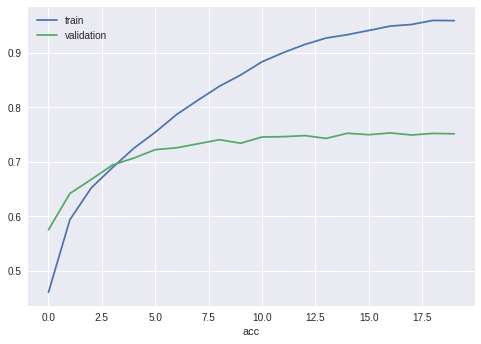

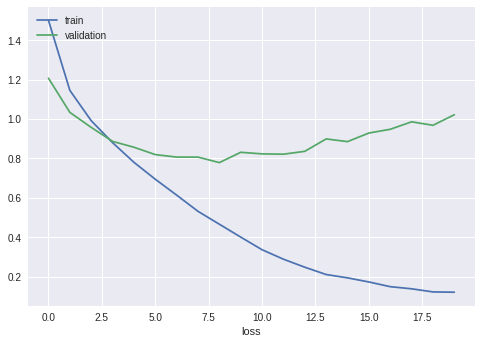

10000/10000 [==============================] - 1s 128us/step


[1.0266126631736756, 0.7465]

In [11]:
show_train_history(train_history, 'acc', 'val_acc')
show_train_history(train_history, 'loss', 'val_loss')
scores = model.evaluate(x_img_test_normalize, y_label_test_OneHot, verbose=1)
scores

## Prediction

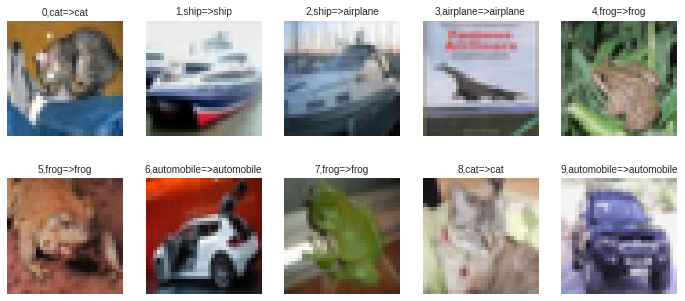

In [12]:
# predict
prediction = model.predict_classes(x_img_test_normalize)
plot_images_labels_prediction(x_img_test, y_label_test, prediction, 0)

In [13]:
# every instance predict probability
predict_probability = model.predict(x_img_test_normalize)
predict_probability[0] #預測各種類的機率

array([6.2615700e-06, 3.5112705e-06, 2.7989336e-05, 9.9683267e-01,
       9.0244121e-06, 2.4442647e-03, 7.8425792e-08, 1.3733047e-06,
       6.7486672e-04, 1.3909265e-09], dtype=float32)

## Confusion Matrix

In [14]:
import pandas as pd
test_labels = []
for i in y_label_test.reshape(-1):
  test_labels.append(label_dict[i])
test_labels = np.array(test_labels)

prediction_labels = []
for i in prediction:
  prediction_labels.append(label_dict[i])
prediction_labels = np.array(prediction_labels)

pd.crosstab(test_labels, prediction_labels, rownames=['labels'], colnames=['prediction'])

prediction,airplane,automobile,bird,cat,deer,dog,frog,horse,ship,truck
labels,,,,,,,,,,
airplane,800,19,35,12,12,7,9,8,65,33
automobile,14,843,6,7,0,6,7,3,34,80
bird,65,4,614,64,85,53,48,38,20,9
cat,35,11,70,555,71,140,42,37,19,20
deer,14,2,51,59,713,30,38,76,12,5
dog,14,1,42,189,41,619,16,56,15,7
frog,5,8,41,74,42,17,795,8,5,5
horse,12,1,20,23,56,39,7,829,3,10
ship,45,28,7,7,8,6,5,2,868,24


## CNN with Three Convolution Layers & Two Hidden Layers

In [15]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same')) # 32 * (32*32*3)
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same')) # 32 * (32*32*3)
model.add(MaxPooling2D(pool_size=(2, 2))) # 32 * (16*16*3)

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same')) # 64 * (16*16*3)
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same')) # 64 * (16*16*3)
model.add(MaxPooling2D(pool_size=(2, 2))) # 64 * (8*8*3)

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same')) # 128 * (8*8*3)
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same')) # 128 * (8*8*3)
model.add(MaxPooling2D(pool_size=(2, 2))) # 128 * (4*4*3)

model.add(Flatten()) # 128*4*4 = 2048 units
model.add(Dropout(0.3))
model.add(Dense(units=2048, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units=1024, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units=10, activation='softmax'))

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 8, 8, 128)         73856     
__________

In [16]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
train_history = model.fit(x=x_img_train_normalize, y=y_label_train_OneHot, epochs=30, batch_size=256, validation_split=0.2, verbose=2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/30
 - 13s - loss: 1.7603 - acc: 0.3382 - val_loss: 1.4451 - val_acc: 0.4682
Epoch 2/30
 - 11s - loss: 1.2758 - acc: 0.5361 - val_loss: 1.0935 - val_acc: 0.6056
Epoch 3/30
 - 11s - loss: 1.0452 - acc: 0.6266 - val_loss: 0.9477 - val_acc: 0.6658
Epoch 4/30
 - 11s - loss: 0.8843 - acc: 0.6886 - val_loss: 0.8241 - val_acc: 0.7117
Epoch 5/30
 - 11s - loss: 0.7829 - acc: 0.7235 - val_loss: 0.7851 - val_acc: 0.7266
Epoch 6/30
 - 11s - loss: 0.6947 - acc: 0.7559 - val_loss: 0.7269 - val_acc: 0.7458
Epoch 7/30
 - 11s - loss: 0.6082 - acc: 0.7852 - val_loss: 0.8128 - val_acc: 0.7317
Epoch 8/30
 - 11s - loss: 0.5448 - acc: 0.8074 - val_loss: 0.7033 - val_acc: 0.7550
Epoch 9/30
 - 11s - loss: 0.4884 - acc: 0.8289 - val_loss: 0.6791 - val_acc: 0.7643
Epoch 10/30
 - 11s - loss: 0.4293 - acc: 0.8489 - val_loss: 0.7016 - val_acc: 0.7669
Epoch 11/30
 - 11s - loss: 0.3757 - acc: 0.8655 - val_loss: 0.6590 - val_acc: 0.7781
Epoch 12/30
 - 11s - los

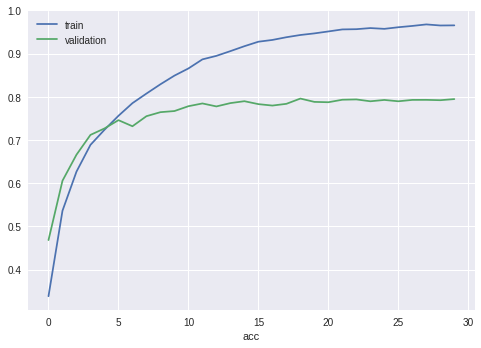

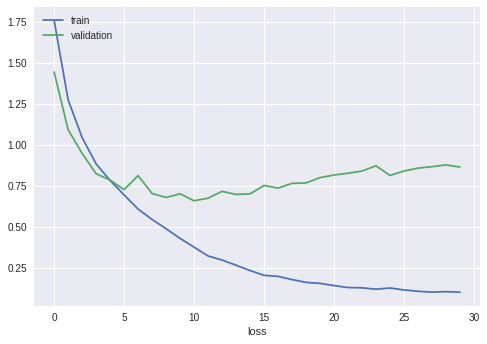

10000/10000 [==============================] - 2s 204us/step


[0.9203023137569427, 0.7809]

In [17]:
show_train_history(train_history, 'acc', 'val_acc')
show_train_history(train_history, 'loss', 'val_loss')
scores = model.evaluate(x_img_test_normalize, y_label_test_OneHot, verbose=1)
scores